In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
f = open('thelittleprince.txt', 'r')
text = f.read()
t_list = text.split('.')

corpus = []

for cumle in t_list:
    corpus.append(cumle.split())

In [3]:
print(corpus[20:30])

[['I', 'have', 'flown', 'a', 'little', 'over', 'all', 'parts', 'of', 'the', 'world;', 'and', 'it', 'is', 'true', 'that', 'geography', 'has', 'been', 'very', 'useful', 'to', 'me'], ['At', 'a', 'glance', 'I', 'can', 'distinguish', 'China', 'from', 'Arizona'], ['If', 'one', 'gets', 'lost', 'in', 'the', 'night,', 'such', 'knowledge', 'is', 'valuable'], ['In', 'the', 'course', 'of', 'this', 'life', 'I', 'have', 'had', 'a', 'great', 'many', 'encounters', 'with', 'a', 'great', 'many', 'people', 'who', 'have', 'been', 'concerned', 'with', 'matters', 'of', 'consequence'], ['I', 'have', 'lived', 'a', 'great', 'deal', 'among', 'grown-ups'], ['I', 'have', 'seen', 'them', 'intimately,', 'close', 'at', 'hand'], ['And', 'that', 'hasn’t', 'much', 'improved', 'my', 'opinion', 'of', 'them'], ['Whenever', 'I', 'met', 'one', 'of', 'them', 'who', 'seemed', 'to', 'me', 'at', 'all', 'clear-sighted,', 'I', 'tried', 'the', 'experiment', 'of', 'showing', 'him', 'my', 'Drawing', 'Number', 'One,', 'which', 'I', '

In [4]:
model = Word2Vec(corpus, window=5, min_count=5, sg=1)

In [5]:
model.wv['rose']

array([-0.00836724,  0.26673028,  0.03499538, -0.06729605,  0.08469769,
       -0.26626605,  0.10504797,  0.31504342, -0.07239968, -0.21606846,
        0.10914823, -0.17574576, -0.0095481 ,  0.06365346,  0.08443472,
       -0.09474725,  0.18908569, -0.06045516,  0.01496295, -0.3010182 ,
        0.01864826, -0.04365587,  0.08092877, -0.11149875, -0.0429214 ,
       -0.02718167, -0.08203159, -0.12633084, -0.08712637,  0.00766988,
        0.03150564, -0.00977486,  0.05035144, -0.12627241, -0.03771522,
        0.22986993,  0.05945347, -0.05612839, -0.00237782, -0.20324059,
        0.07039928, -0.12064809, -0.06646477,  0.00985789,  0.08072117,
       -0.06579548, -0.03031234, -0.07874149,  0.12602136,  0.08555952,
        0.0718822 , -0.14920403,  0.08841046,  0.04524783, -0.03712043,
        0.00596431,  0.02658977, -0.00275026, -0.16097535,  0.07507633,
        0.07464008,  0.02023275,  0.05870524, -0.05471975, -0.11188893,
        0.10751501,  0.07375535, -0.05523072, -0.21425667,  0.14

In [6]:
model.wv.most_similar('rose')

[('anyone', 0.9982529282569885),
 ('own', 0.998195230960846),
 ('On', 0.998193621635437),
 ('different', 0.9981709718704224),
 ('find', 0.9981526732444763),
 ('before', 0.9981069564819336),
 ('heart', 0.9981006383895874),
 ('drawing', 0.99809730052948),
 ('also', 0.9980909824371338),
 ('had', 0.9980707764625549)]

In [7]:
model.save('word2vec.model')

In [8]:
model = Word2Vec.load('word2vec.model')

In [9]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()

/Users/cangoymen/miniforge3/envs/jupyter/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/cangoymen/miniforge3/envs/jupyter/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


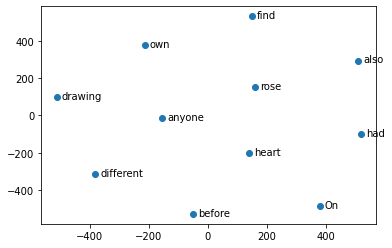

In [10]:
closestwords_tsneplot(model, 'rose')